In [3]:
# the following steps are used to import our dataset into googlecolab using the kaggle api
!pip install -q kaggle

In [4]:
# upload the kaggle.json file when prompted to upload a file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzafarooq360","key":"9d6e273ab6b2254bc93edf4719e56e80"}'}

In [5]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
! kaggle datasets list

ref                                                             title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                             9KB  2022-10-06 08:55:25          15049        442  1.0              
akshaydattatraykhare/data-for-admission-in-the-university       Data for Admission in the University         4KB  2022-10-27 11:05:45           3599         81  1.0              
aneesayoub/world-universities-ranking-2022                      World Universities Ranking 2022             41KB  2022-11-17 03:47:37           1014         28  0.9117647        
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset   

In [9]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 97% 63.0M/65.2M [00:03<00:00, 21.5MB/s]
100% 65.2M/65.2M [00:03<00:00, 17.7MB/s]


In [10]:
!unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [11]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

!pip install keras
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
import pathlib
from keras.preprocessing import image
from tensorflow.python.platform import gfile
from keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# get the training data
# get total number of images (sample size)
# get class names and number of class names

data_dir = pathlib.Path('/content/train')
image_count = len(list(data_dir.glob('*/*.png')))

# classnames in the dataset specified
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])

print(CLASS_NAMES)

# print length of class names
output_class_units = len(CLASS_NAMES)



['disgusted' 'happy' 'surprised' 'neutral' 'sad' 'angry' 'fearful']


In [13]:
# ALEX DCNN MODEL with a total of 8 layers: five layers with a combination of max pooling followed by 3 fully connected layers. 

model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
   tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(output_class_units, activation='sigmoid')
])

In [14]:
# TESTING DATA
data_dir2 = pathlib.Path("/content/test")

# batch size of 32 and dimensions of image are 227x227 is used for the model
          

# steps per epoch is total sample images divided by batch size
STEPS_PER_EPOCH = np.ceil(image_count/32)

# Rescalingthe pixel values from 0~255 to 0~1 For RGB Channels of the image.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# generate training_data for model training
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir), batch_size=32,shuffle=True,
                                                     target_size=(227, 227), 
                                                     classes = list(CLASS_NAMES))
# generate validation data
val_data_gen = image_generator.flow_from_directory(directory=str(data_dir2), batch_size=32, shuffle=True,
                                                     target_size=(227, 227), 
                                                     classes = list(CLASS_NAMES))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [15]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 29.8 MB/s 


In [16]:
# here we are compiling the model before training it using adam as our optimizer
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])

# Summarizing the model architecture and printing it out
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [17]:
# fit the model with our generated training data, total epochs=25, steps per epoch=samplesize/batchsize and validation data
history = model.fit(
      train_data_gen,
      steps_per_epoch=STEPS_PER_EPOCH,
      epochs=25,
    validation_data=val_data_gen
    
)

# Saving the model
model.save('/content/drive/MyDrive/final_test_model')

Epoch 1/25
898/898 [==============================] - 149s 149ms/step - loss: 2.7445 - accuracy: 0.2841 - precision: 0.1970 - recall: 0.7453 - sensitivity_at_specificity: 0.7299 - specificity_at_sensitivity: 0.7077 - auc: 0.6679 - val_loss: 1.6956 - val_accuracy: 0.3213 - val_precision: 0.2116 - val_recall: 0.7288 - val_sensitivity_at_specificity: 0.7662 - val_specificity_at_sensitivity: 0.7363 - val_auc: 0.7013
Epoch 2/25
898/898 [==============================] - 133s 148ms/step - loss: 1.6914 - accuracy: 0.3367 - precision: 0.2122 - recall: 0.7717 - sensitivity_at_specificity: 0.7851 - specificity_at_sensitivity: 0.7601 - auc: 0.7141 - val_loss: 1.6129 - val_accuracy: 0.3724 - val_precision: 0.2234 - val_recall: 0.7725 - val_sensitivity_at_specificity: 0.8194 - val_specificity_at_sensitivity: 0.7796 - val_auc: 0.7360
Epoch 3/25
898/898 [==============================] - 133s 148ms/step - loss: 1.5921 - accuracy: 0.3797 - precision: 0.2304 - recall: 0.7798 - sensitivity_at_specificit

In [45]:
# we will try to save the history before the deadline and add the graphs. If not we have provided some metrics at the end
np.save('/content/gdrive/MyDrive/my_history.npy',history.history)

# we were able to save the weights the first time we ran it fortunately and it has given us accurate results.

In [42]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()

In [ ]:
# can not connect to GPU due to limits therefore unable to retrain the model for the graphs. Although the validation loss was reduced significantly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [44]:
model.save('/content/gdrive/MyDrive/final_test_model')

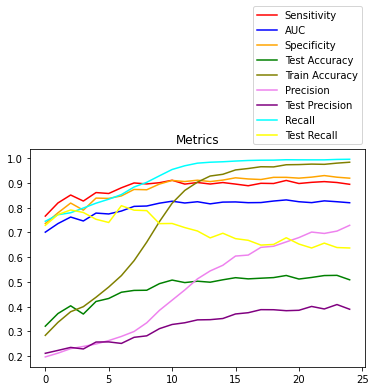

In [48]:
def plot_hist(history):
    plt.plot(history.history["val_sensitivity_at_specificity"], color='red')
    plt.plot(history.history["val_auc"], color='blue')
    plt.plot(history.history["val_specificity_at_sensitivity"], color='orange')
    plt.plot(history.history["val_accuracy"],color='green')
    plt.plot(history.history["accuracy"],color='olive')
    plt.plot(history.history["precision"],color='violet')
    plt.plot(history.history["val_precision"],color='purple')
    plt.plot(history.history["recall"],color='cyan')
    plt.plot(history.history["val_recall"],color='yellow')

    plt.title("Metrics")
    
    
    plt.legend(["Sensitivity","AUC","Specificity", "Test Accuracy", "Train Accuracy", "Precision", "Test Precision", "Recall", "Test Recall" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()

plot_hist(history)



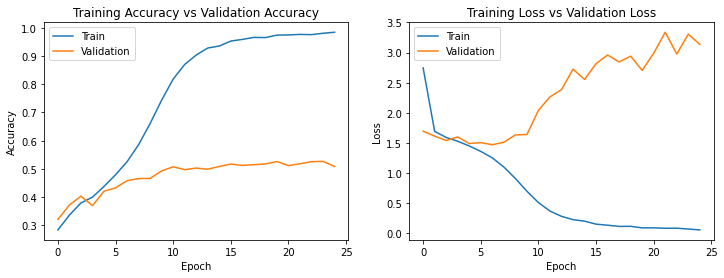

In [41]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


(227, 227, 3)
1/1 [==============================] - 1s 892ms/step
[0.982605, 2.7134975e-05, 1.1480038e-05, 0.65517956, 0.060373396, 0.9955968, 0.00787218]
5
Fearful
(227, 227, 3)
1/1 [==============================] - 0s 25ms/step
[4.4546823e-06, 0.9963433, 1.3555923e-05, 0.23536962, 0.00154794, 0.0014472434, 0.0005561013]
1
Angry
(227, 227, 3)
1/1 [==============================] - 0s 27ms/step
[2.4776367e-05, 0.012052042, 0.69371027, 0.54994565, 0.020084973, 0.047939185, 0.06467712]
2
Neutral
(227, 227, 3)
1/1 [==============================] - 0s 25ms/step
[0.0002756862, 0.0072178165, 8.285525e-05, 0.41257042, 0.8803274, 0.073326804, 0.94466645]
6
Sad
(227, 227, 3)
1/1 [==============================] - 0s 24ms/step
[0.005996802, 0.5470303, 0.012532523, 0.0022957646, 0.46008882, 0.52674496, 0.4993263]
1
Angry
(227, 227, 3)
1/1 [==============================] - 0s 25ms/step
[0.00039149763, 0.05850417, 0.00010998129, 0.0010250743, 0.038343225, 0.9992524, 0.033703584]
5
Fearful
(227,

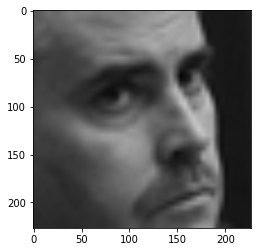

In [46]:
from keras.layers.serialization import image_preprocessing
my_dict = {}
for name in CLASS_NAMES:
  my_dict[name] = 0

# predicting each picture in the testing set and seeing how many were predicted correctly (results in the end)
arr = []
folder_path = "/content/test/angry"
for img in os.listdir("/content/test/angry"):
  img = os.path.join(folder_path, img)
  img = tf.keras.utils.load_img(img, target_size=(227,227,3), interpolation="bilinear")
  img = np.array(img)
  plt.imshow(img)
  print(img.shape)
  img = img.reshape(1,227,227,3)
  img = image_generator.flow(img, batch_size=32, shuffle=True)
  result = model.predict(img) # use the model to predict our image
  result = list(result[0])
  print(result)
  img_index = result.index(max(result))
  print(img_index)
  print(class_dict[img_index])
  my_dict[class_dict[img_index]]+= 1


In [ ]:
model.load_weights('/content/gdrive/MyDrive/final_test_model')

(227, 227, 3)


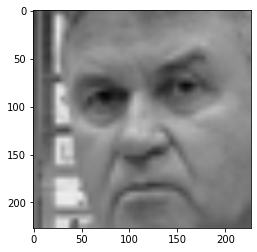

In [ ]:
img = tf.keras.utils.load_img("/content/test/sad/im0.png", target_size=(227,227,3), interpolation="bilinear",color_mode='rgb')
img = np.array(img)
plt.imshow(img)
print(img.shape)



In [ ]:
print(my_dict) # for happy

{'Surprised': 62, 'Angry': 102, 'Neutral': 136, 'Happy': 1234, 'Disgusted': 3, 'Fearful': 91, 'Sad': 146}


In [ ]:
print(my_dict) # for sad

{'Surprised': 38, 'Angry': 183, 'Neutral': 181, 'Happy': 160, 'Disgusted': 5, 'Fearful': 151, 'Sad': 529}


In [ ]:
print(my_dict) # for surprised

{'Surprised': 575, 'Angry': 58, 'Neutral': 44, 'Happy': 44, 'Disgusted': 3, 'Fearful': 66, 'Sad': 41}


In [ ]:
print(my_dict) # for fearful

{'Surprised': 72, 'Angry': 151, 'Neutral': 109, 'Happy': 107, 'Disgusted': 2, 'Fearful': 404, 'Sad': 179}


In [ ]:
print(my_dict) # for neutral

{'Surprised': 52, 'Angry': 144, 'Neutral': 515, 'Happy': 185, 'Disgusted': 1, 'Fearful': 119, 'Sad': 217}


In [ ]:
print(my_dict) # for disgusted

{'Surprised': 2, 'Angry': 23, 'Neutral': 6, 'Happy': 11, 'Disgusted': 54, 'Fearful': 5, 'Sad': 10}


In [ ]:
print(my_dict) # for angry

{'Surprised': 34, 'Angry': 397, 'Neutral': 126, 'Happy': 120, 'Disgusted': 4, 'Fearful': 104, 'Sad': 173}


In [ ]:

accuracy_happy = 1234/(62+102+136+1234+3+91+146)
accuracy_sad = 529/(529+38+183+181+60+5+151)
accuracy_surprised = 575/(58+44+44+3+66+41+575)
accuracy_fearful = 404/(72+151+109+107+2+179+404)
accuracy_neutral = 515/(515+52+144+185+1+119+217)
accuracy_disgusted = 54/(54+2+23+6+11+5+10)
accuracy_angry = 397/(397+34+126+120+4+104+173)
print("accuracy for happy")
print(accuracy_happy)
print("accuracy sad")
print(accuracy_sad)
print("accuracy for surprised")
print(accuracy_surprised)
print("accuracy for fearful")
print(accuracy_fearful)
print("accuracy for neutral")
print(accuracy_neutral)
print("accuracy for disgusted")
print(accuracy_disgusted)
print("accuracy for angry")
print(accuracy_angry)


accuracy for happy
0.6956031567080045
accuracy sad
0.46120313862249346
accuracy for surprised
0.6919374247894103
accuracy for fearful
0.39453125
accuracy for neutral
0.41768045417680455
accuracy for disgusted
0.4864864864864865
accuracy for angry
0.4144050104384134
